'''
# Downdload Data (about 10 min)
PS C:\Users\USER\Desktop\L1000> aws s3 cp `
>>   s3://lincs-dcic/LINCS-sigs-2021/gctx/cd-coefficient/cp_coeff_mat.gctx `
>>   . `
>>   --no-sign-request
>>
'''
## Tutorial
# https://github.com/cmap/cmapPy/blob/master/tutorials/cmapPy_pandasGEXpress_tutorial.ipynb 

# Data Structure Check

## Change pert_type, genes, gctx_fp

In [21]:
import pandas as pd
from cmapPy.pandasGEXpress.parse import parse
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1) Signature QC Filtering
sig_info = pd.read_csv('siginfo_beta.txt', sep='\t')

sig_cp = sig_info[sig_info['pert_type'] == 'trt_cp']

mask = (
    (sig_cp['qc_pass'] >= 1) &
    (sig_cp['median_recall_rank_spearman'] <= 5) &
    (sig_cp['cc_q75'] >= 0.2) &
    (sig_cp['pct_self_rank_q25'] <= 5) &
    (sig_cp['is_exemplar_sig'] == 1)
)

filtered_sigs = sig_cp.loc[mask, 'sig_id']

# 2) Gene mapping
gene_info = pd.read_csv('geneinfo_beta.txt', sep='\t', dtype=str)
gene_info.set_index('gene_symbol', inplace=True)
genes = ['FXYD3'] # Setup Gene 


rids = gene_info.loc[genes, 'gene_id'].tolist()


gctx_fp = "level5_beta_trt_cp_n720216x12328.gctx"

col_meta_df = parse(gctx_fp, col_meta_only=True)
available_cids = set(col_meta_df.index.astype(str))

row_meta_df = parse(gctx_fp, row_meta_only=True)
available_rids = set(row_meta_df.index.astype(str))

print(f'Available Sample Counts: {len(available_rids)}')

# 3) GCTX subset parsing

valid_cids = [cid for cid in filtered_sigs if cid in available_cids]
valid_rids = [rid for rid in rids if rid in available_rids]

gctoo = parse(gctx_fp,
              cid=valid_cids,
              rid=valid_rids
              )

C:\Users\USER\AppData\Local\Temp\ipykernel_15980\3218683106.py:8: DtypeWarning: Columns (0,3,4,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  sig_info = pd.read_csv('siginfo_beta.txt', sep='\t')
c:\Users\USER\anaconda3\envs\moa_llm\lib\site-packages\cmapPy\pandasGEXpress\parse_gctx.py:275: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  meta_df = meta_df.apply(lambda x: pd.to_numeric(x, errors="ignore"))
c:\Users\USER\anaconda3\envs\moa_llm\lib\site-packages\cmapPy\pandasGEXpress\parse_gctx.py:275: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  meta_df = meta_df.apply(lambda x: pd.to_numeric(x, errors="ignore"))
c:\Users\USER\anaconda3\envs\moa_llm\lib\site-packages\cmapPy\pandasGEXpress\parse_gctx.py:275: FutureWarning: er

Available Sample Counts: 12328


c:\Users\USER\anaconda3\envs\moa_llm\lib\site-packages\cmapPy\pandasGEXpress\parse_gctx.py:275: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  meta_df = meta_df.apply(lambda x: pd.to_numeric(x, errors="ignore"))


In [22]:
full_df = gctoo.data_df
full_df

cid,ABY001_A375_XH:BRD-A90490067:10:24,ABY001_HEPG2_XH:BRD-K70511574:10:24,ABY001_HEPG2_XH:BRD-K85606544:2.5:24,ABY001_NCIH2073_XH:BRD-A61304759:2.5:24,ABY001_NCIH2073_XH:BRD-K66175015:10:24,ABY001_NCIH2073_XH:BRD-K70401845:2.5:24,ABY001_NCIH508_XH:BRD-A61304759:10:24,ABY001_NCIH508_XH:BRD-A90490067:2.5:24,ABY001_NCIH508_XH:BRD-K19687926:10:24,ABY001_NCIH508_XH:BRD-K21680192:10:24,...,TAA001_SHSY5Y_24H:O13,TAA001_SHSY5Y_24H:P21,TSAI001_221NPC1_XH:C646:10,TSAI001_221NPC1_XH:CI-994:10,TSAI001_221NPC1_XH:COMPE:2,TSAI001_221NPC1_XH:SRT3657:5,TSAI002_NPC-2_XH:DAC-3:5,TSAI002_NPC-2_XH:SAHA:2.5,TSAI002_NPC-6_XH:943:10,TSAI002_NPC-6_XH:949:10
rid,,,,,,,,,,,,,,,,,,,,,
5349,-0.561803,0.737935,0.122925,-0.107356,1.297044,1.904454,0.163417,-0.563309,2.397717,-0.215567,...,0.876674,-0.004746,-0.43107,-0.3182,-0.375558,-0.537143,0.825584,-0.571128,0.670373,-0.341985


In [23]:
# 4) Load sig_info metadata for valid sample
filt_sig = sig_info.set_index('sig_id', drop=False)
valid_sig_meta = filt_sig.loc[valid_cids]

print(f'Sample Counts: {len(valid_cids)}')
print(f'Compound Counts: {len(valid_sig_meta["cmap_name"].unique())}')
print(f'Cell Line Counts: {len(valid_sig_meta["cell_iname"].unique())}')


Sample Counts: 29054
Compound Counts: 9235
Cell Line Counts: 57


## Change Cell line name

In [24]:
# Lung cancer
print((valid_sig_meta['cell_iname'] == 'HEPG2').value_counts())

cell_iname
False    27594
True      1460
Name: count, dtype: int64


In [25]:
sel_cols = ['pert_dose', 'pert_time', 'cell_mfc_name', 'cmap_name', 'is_exemplar_sig']

meta_df = valid_sig_meta.loc[full_df.columns, sel_cols].T

full_df = pd.concat([full_df, meta_df], axis=0)
full_df

cid,ABY001_A375_XH:BRD-A90490067:10:24,ABY001_HEPG2_XH:BRD-K70511574:10:24,ABY001_HEPG2_XH:BRD-K85606544:2.5:24,ABY001_NCIH2073_XH:BRD-A61304759:2.5:24,ABY001_NCIH2073_XH:BRD-K66175015:10:24,ABY001_NCIH2073_XH:BRD-K70401845:2.5:24,ABY001_NCIH508_XH:BRD-A61304759:10:24,ABY001_NCIH508_XH:BRD-A90490067:2.5:24,ABY001_NCIH508_XH:BRD-K19687926:10:24,ABY001_NCIH508_XH:BRD-K21680192:10:24,...,TAA001_SHSY5Y_24H:O13,TAA001_SHSY5Y_24H:P21,TSAI001_221NPC1_XH:C646:10,TSAI001_221NPC1_XH:CI-994:10,TSAI001_221NPC1_XH:COMPE:2,TSAI001_221NPC1_XH:SRT3657:5,TSAI002_NPC-2_XH:DAC-3:5,TSAI002_NPC-2_XH:SAHA:2.5,TSAI002_NPC-6_XH:943:10,TSAI002_NPC-6_XH:949:10
5349,-0.561803,0.737935,0.122925,-0.107356,1.297044,1.904454,0.163417,-0.563309,2.397717,-0.215567,...,0.876674,-0.004746,-0.43107,-0.3182,-0.375558,-0.537143,0.825584,-0.571128,0.670373,-0.341985
pert_dose,10.0,10.0,2.5,2.5,10.0,2.5,10.0,2.5,10.0,10.0,...,10.0,1.11111,10.0,10.0,2.0,5.0,5.0,2.5,10.0,10.0
pert_time,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,...,24.0,24.0,-666.0,-666.0,-666.0,-666.0,-666.0,-666.0,-666.0,-666.0
cell_mfc_name,A375,HEPG2,HEPG2,NCIH2073,NCIH2073,NCIH2073,NCIH508,NCIH508,NCIH508,NCIH508,...,SHSY5Y,SHSY5Y,22_1_NPC_1,22_1_NPC_1,22_1_NPC_1,22_1_NPC_1,NPC-2,NPC-2,NPC-6,NPC-6
cmap_name,fulvestrant,HMN-214,neratinib,tanespimycin,afatinib,erlotinib,tanespimycin,fulvestrant,lapatinib,mitoxantrone,...,piclamilast,pentylenetetrazol,C646,CI-994,compe,SRT-3657,DAC-3,saha,943,949
is_exemplar_sig,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


## Change Cell Line name

In [32]:
# Sorting with each cell line
HEPG2 = full_df.T[full_df.T['cell_mfc_name'] == 'HEPG2']

In [84]:
HEPG2.to_excel('HEPG2.xlsx')

## Visualization drug resposne

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_expression_by_cells(
    df,
    response_col,
    cell_names=None,
    cell_col='cell_mfc_name',
    figsize=(8,6)
):
    """
    Compare expression of a single gene (response_col) across multiple cell lines.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame containing response data.
    response_col : str
        Column name for the response values (e.g. gene '2879').
    cell_names : list of str, optional
        List of cell line names to include. If None, use all in df[cell_col].
    cell_col : str, default 'cell_mfc_name'
        Column name for cell line identifiers.
    figsize : tuple, default (8,6)
        Figure size.
    """
    # determine which cell lines to plot
    all_cells = df[cell_col].unique().tolist()
    cell_list = all_cells if cell_names is None else list(cell_names)
    
    # prepare colors
    cmap = plt.get_cmap('tab10')
    colors = [cmap(i) for i in range(len(cell_list))]
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # scatter each cell line with horizontal jitter
    for idx, cell in enumerate(cell_list):
        sub = df[df[cell_col] == cell]
        if sub.empty:
            raise ValueError(f"No data for cell line {cell!r}")
        
        y = sub[response_col].astype(float).values
        x = np.random.normal(loc=idx, scale=0.05, size=len(y))
        ax.scatter(x, y, label=cell, alpha=0.6, color=colors[idx], edgecolor='k', s=40)
    
    # final formatting
    ax.set_xticks(range(len(cell_list)))
    ax.set_xticklabels(cell_list, rotation=45, ha='right')
    ax.set_xlabel(cell_col)
    ax.set_ylabel(response_col)
    ax.set_title(f"{response_col} expression across {len(cell_list)} cell lines")
    ax.legend(title="Cell line", bbox_to_anchor=(1,1))
    plt.tight_layout()
    plt.show()


def plot_expression_by_drugs(
    df,
    response_col,
    drug_names,
    drug_col='cmap_name',
    dose_col='pert_dose',
    time_col='pert_time',
    figsize=(8,6)
):
    """
    Compare the expression of a single gene (response_col) under multiple drug
    treatments within a single cell line. Each drug is colored by tab10 and each
    time point uses a different marker shape.
    
    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame already filtered to one cell line.
    response_col : str
        Column name for the response values (e.g. gene '2879').
    drug_names : str or list of str
        Drug name or list of drug names to compare.
    drug_col : str, default 'cmap_name'
        Column name for drug identifiers.
    dose_col : str, default 'pert_dose'
        Column name for dose values.
    time_col : str, default 'pert_time'
        Column name for timepoints.
    figsize : tuple, default (8,6)
        Figure size.
    """
    # ensure drug_names is a list
    drug_list = [drug_names] if isinstance(drug_names, str) else list(drug_names)
    # prepare colors and marker styles
    cmap = plt.get_cmap('tab10')
    colors = [cmap(i) for i in range(len(drug_list))]
    markers = ['o', 's', 'D', '^', 'v', 'P', 'X']
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # plot each drug and each time point
    for i, drug in enumerate(drug_list):
        sub = df[df[drug_col] == drug]
        if sub.empty:
            raise ValueError(f"No data for drug {drug!r}")
        
        sub = sub.copy()
        sub['dose_num'] = sub[dose_col].astype(float)
        sub['time_num'] = sub[time_col].astype(float)
        
        for j, t in enumerate(sorted(sub['time_num'].unique())):
            sel = sub[sub['time_num'] == t]
            ax.scatter(
                sel['dose_num'],
                sel[response_col],
                color=colors[i],
                marker=markers[j % len(markers)],
                edgecolor='k',
                s=60,
                alpha=0.7,
                label=f"{drug} ({int(t)}h)"
            )
    
    # apply log scale and labels
    ax.set_xscale('log')
    ax.set_xlabel(dose_col)
    ax.set_ylabel(response_col)
    ax.set_title(f"{response_col} by {len(drug_list)} drug(s)")
    
    # set x-ticks at unique dose values
    all_doses = np.sort(df[df[drug_col].isin(drug_list)][dose_col].astype(float).unique())
    ax.set_xticks(all_doses)
    ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x,_: f"{x:g}"))
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    
    ax.legend(title=f"{drug_col} (Time)", bbox_to_anchor=(1,1))
    plt.tight_layout()
    plt.show()


def plot_expression_by_cells_box(
    df,
    response_col,
    cell_names=None,
    cell_col='cell_mfc_name',
    figsize=(8,6),
    palette_name='tab10'
):
    """
    Compare expression of a single gene (response_col) across multiple cell lines
    using a box plot. Each box uses colors from the specified matplotlib palette.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame containing response data.
    response_col : str
        Column name for the response values (e.g. gene '2879').
    cell_names : list of str, optional
        List of cell line names to include. If None, use all in df[cell_col].
    cell_col : str, default 'cell_mfc_name'
        Column name for cell line identifiers.
    figsize : tuple, default (8,6)
        Figure size.
    palette_name : str, default 'tab10'
        Matplotlib colormap name for box colors.
    """
    # determine which cell lines to plot
    if cell_names is None:
        cells_to_plot = df[cell_col].unique().tolist()
    else:
        cells_to_plot = list(cell_names)
    
    # filter DataFrame
    sub = df[df[cell_col].isin(cells_to_plot)].copy()
    if sub.empty:
        raise ValueError(f"No data for cell lines: {cells_to_plot!r}")
    
    # prepare palette colors
    cmap = plt.get_cmap(palette_name)
    colors = [cmap(i) for i in range(len(cells_to_plot))]

    # plot boxplot and overlay swarm
    plt.figure(figsize=figsize)
    sns.boxplot(
        x=cell_col,
        y=response_col,
        data=sub,
        order=cells_to_plot,
        palette=colors,
        showcaps=True,
        showfliers=True,
        whiskerprops={'linewidth':1}
    )
    sns.swarmplot(
        x=cell_col,
        y=response_col,
        data=sub,
        order=cells_to_plot,
        color='k',
        size=3,
        alpha=0.6
    )
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(cell_col)
    plt.ylabel(response_col)
    plt.title(f"{response_col} expression across {len(cells_to_plot)} cell line(s) [Box Plot]")
    plt.tight_layout()
    plt.show()


## Change Cell line name, Gene Name, Compound Name

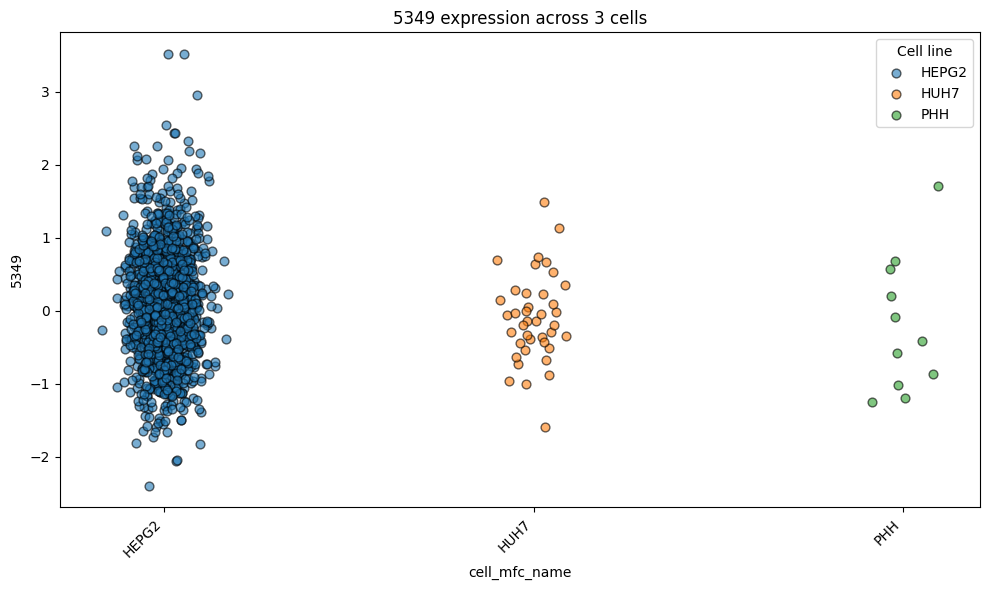

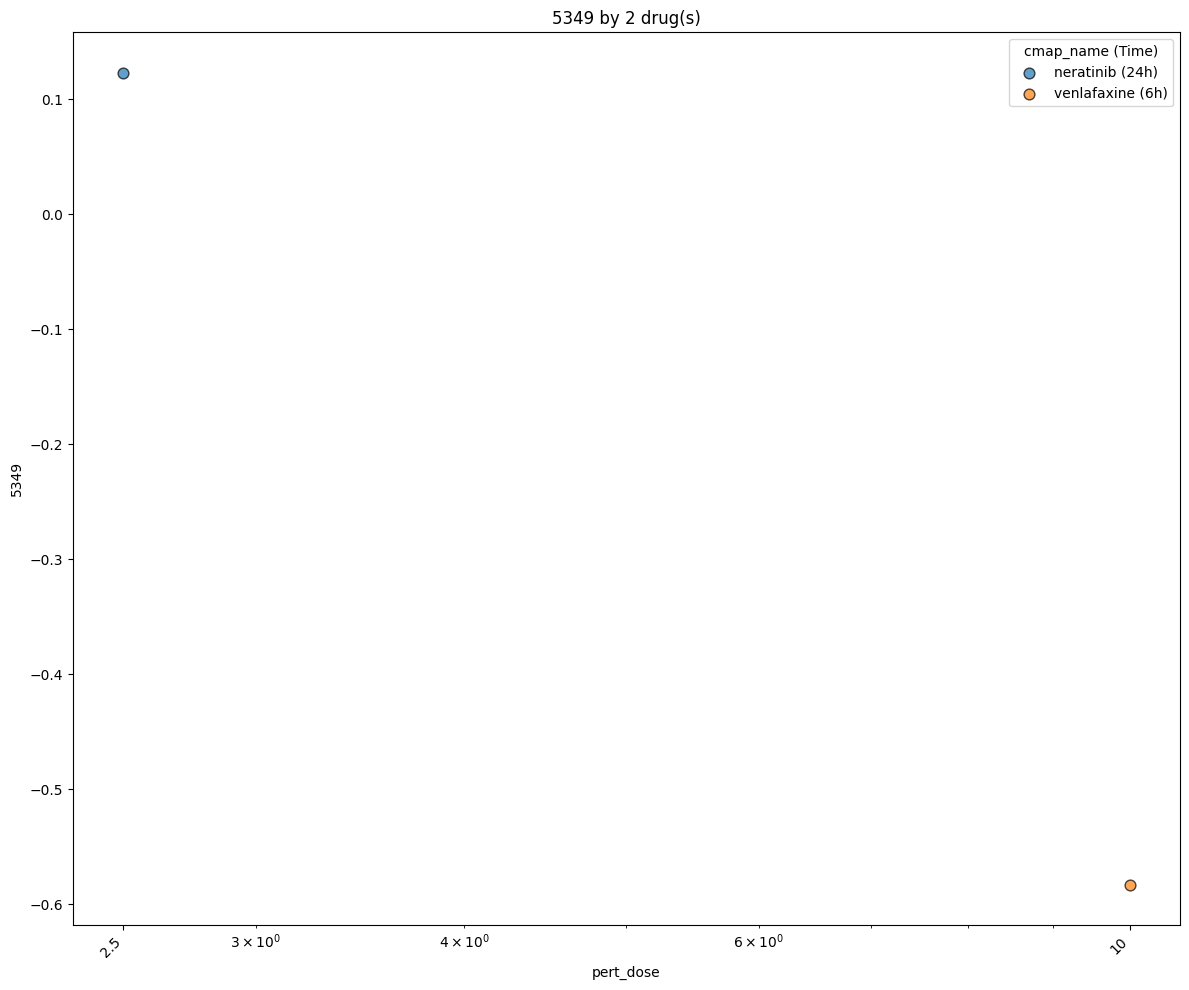

C:\Users\USER\AppData\Local\Temp\ipykernel_15980\1361191721.py:164: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


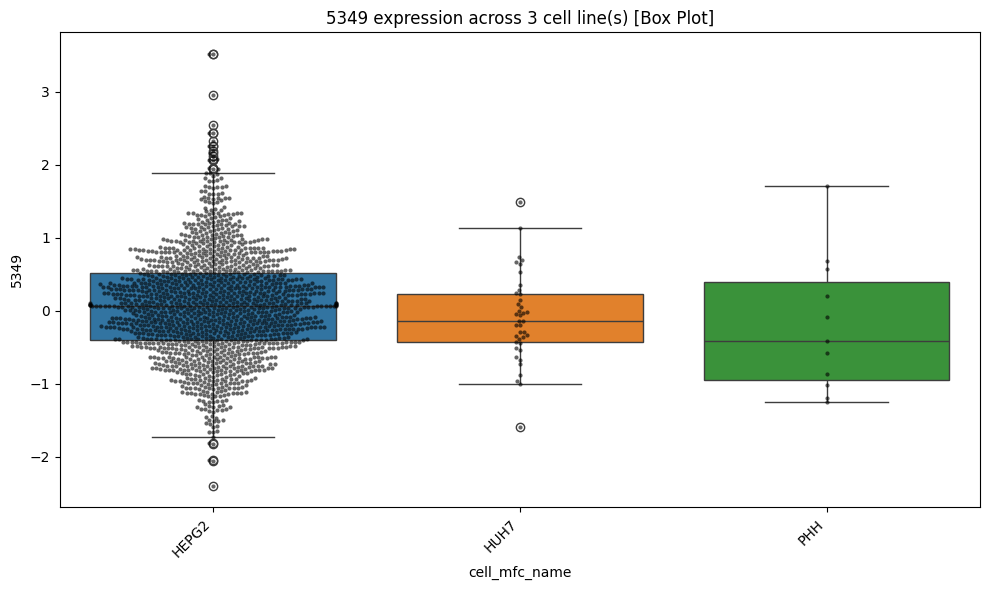

In [44]:
# 1) Various Cell line Compare
plot_expression_by_cells(
    df=full_df.T,
    response_col='5349',
    cell_names=['HEPG2','HUH7','PHH'],
    cell_col='cell_mfc_name',
    figsize=(10,6)
)

# 2) Single Cell Drug response compare
plot_expression_by_drugs(
    df=HEPG2,
    response_col='5349',
    drug_names=['neratinib', 'venlafaxine'],
    drug_col='cmap_name',
    dose_col='pert_dose',
    time_col='pert_time',
    figsize=(12,10)
)

# 3) Various Cell line Compare
plot_expression_by_cells_box(
    df=full_df.T,
    response_col='5349',
    cell_names=['HEPG2','HUH7','PHH'],
    figsize=(10,6)
)

# CMAP LINCS 2020 (https://clue.io/data/CMap2020#LINCS2020)

trt_cp	compounds
trt_sh	shRNA
trt_oe	over-expression
trt_xpr	CRISPR
trt_misc	other treatments (ex: ligands, siRNA, etc)
ctl	negative controls (ex: DMSO, untreated)